In [710]:
# used for working with matrices
import numpy

# used to import sigmoid function
import scipy.special 

# used for plotting
import matplotlib.pyplot
%matplotlib inline

In [711]:
# creating test matrix
a = numpy.zeros([3, 2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [712]:
# You can change value like below
a[0, 0] = 1
a[0, 1] = 2
a[1, 0] = 3
a[1, 1] = 4
a[2, 0] = 5
a[2, 1] = 6
a

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

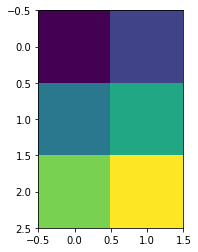

In [713]:
# Plotting array
matplotlib.pyplot.imshow(a)

In [714]:
# neural network class
class NeuralNetwork:
    
    # init neural net
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Node values
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # setting weights randomly, between -0.5 and +0.5
        # remember weights are between nodes, and each row is one
        # node
        
        # may seem backwards
        # THESE ARE WEIGHTS
        
        # from input to hidden
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        print(self.wih)
        
        # from hidden to output
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)

        # setting random weights
        # this way gets the central distrobutuion of random
#         self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
#         self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function
        self.activation = lambda x: scipy.special.expit(x)
        pass
    
    # query net
    # this mainly focuses on the input and out layers
    # the first nodes and the last nodes need to be delt with at this query level
    def query(self, inputs_list):
        # inputs converted to 2d array and transposed to be fed into array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # This connects the inputs to the input to hidden part of 2d array above in __init__
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # To get signals from hidden nde
        # this takes use to the middle layer
        hidden_outputs = self.activation(hidden_inputs)
        
        # calculates signals in final out layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calcs signal from output
        final_outputs = self.activation(final_inputs)
        return final_outputs
    
    # train nn
    # To parts of trainging, propagating the network and backpra gating
    def train(self, inputs_list, target_list):
        # inputs converted to 2d array and transposed to be fed into array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # targets converted to 2d array and transposed to be fed into array
        targets = numpy.array(target_list, ndmin=2).T
        
        # This connects the inputs to the input to hidden part of 2d array above in __init__
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # To get signals from hidden nde
        # this takes use to the middle layer
        hidden_outputs = self.activation(hidden_inputs)
        
        # calculates signals in final out layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calcs signal from output
        final_outputs = self.activation(final_inputs)
        
        # calc error = target - output
        # this is happening at the end of the net
        # between hidden and final layer
        output_errors = targets - final_outputs
        
        # we are sendning a propation of the error down each weight
        # remember w11/w11+w21
        # but transposing the weights allowed use to avoud the bottom divsion
        # between hidden and input layer
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # now using the equation for changing weight
        #             e     * sig(E w * o) * (1 - sig(E w * o)) * O
        # we will add or subtract from each weight
        
         # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

In [715]:
# three input nodes and three hidden layer
# each row is a hidden layer node
(numpy.random.rand(3, 3) - 0.5)

array([[ 0.05045573,  0.00389503,  0.26883114],
       [-0.04402464,  0.10437505,  0.37550805],
       [ 0.47515057, -0.39866528,  0.32225013]])

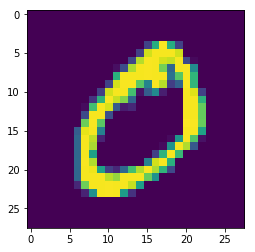

In [716]:
# GOING TO WORK ON MNIST DATASET WITH THREE LAYER NET
data_file = open("mnist_train.csv", 'r')
data_list = data_file.readlines()
data_file.close()
# selecting the first item in list
data_list[0]
# label is first number, and rest is pixel data

# plotting

# converting in normal list
all_values = data_list[1].split(",")

# reshaping array for plotting 28 by 28
# ONLY WAY RESHAPING WORKS IF BELOW TRUE
# Must make complete square total of 784 entries in all_values, so 28 x 28 = 784
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))

# Scaling all values between 0.01 and 1.00
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

# plotting
matplotlib.pyplot.imshow(image_array)

In [717]:
# the network will have an output of 10, each representing the posibiity of the number
# target array will look like bottom
# target label of 5 will look like this
#  0       1     2     3     4     5     6     7    8     9
# [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01]
# indexes match with label

# number of output nodes
onodes = 10

# creates an 1D array of 10 zeros, and adds 0.01 to each entry
targets = numpy.zeros(onodes) + 0.01

# get int value of label, label is in string format before
label = int(all_values[0])

# Index and label matches up, so make that index position equal to 0.99
targets[label] = 0.99


In [718]:
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [719]:
# now doing code for neural network training

# number of pixels = number of input nodes
input_nodes = 784

# UNKNOWN HOW TO CHOOSE
# always choose lower that input because purpose of NN is to find common patterns, with is always lower than input
# Choosing lower values, force NN to summarize data
hidden_nodes = 300

# 10 possible answers, so 10 nodes
output_nodes = 10

# learning rate, how slowly weights will change
learning_rate = 0.1

# create net
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


# loading data
data_file = open("mnist_train.csv", 'r')
data_list = data_file.readlines()
data_file.close()

# this section goes through each entry and trains data

#######################################################
# THIS PART OF THE CODE CHANGES THE NEURAL NETWORK!!!!!!!!
#######################################################


# Running 2 epochs on data
print("NUMBER OF TEST DATA: {}".format(len(data_list)))
for i in range(1, 6):
    for record in data_list:
        # converting in normal list
        all_values = record.split(",")
    
        # Scaling all values between 0.01 and 1.00 color of pixel
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
        # creates an 1D array of 10 zeros, and adds 0.01 to each entry
        targets = numpy.zeros(output_nodes) + 0.01

        # get int value of label, label is in string format before
        label = int(all_values[0])

        # Index and label matches up, so make that index position equal to 0.99
        targets[label] = 0.99
    
        # target array has been created and values of pixels have been scaled
        # feeding inputs and targets into neural network
        n.train(inputs, targets)
    
    
    
    

    





NUMBER OF TEST DATA: 60000


In [722]:
# loading test files
test_file = open("mnist_test.csv", 'r')
test_list = test_file.readlines()
test_file.close()

# testing one value 
# converting in normal list
# all_values = test_list[2].split(",")

# print(all_values[0])

# # Scaling all values between 0.01 and 1.00 color of pixel
# inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

# answer = n.query(inputs)

# print(answer)


correct = []
wrong = []
total_test = 0

# go through rest of test data and score
# THIS DOES NOT CHANGE NUERAL NETWORK

for record in test_list:
    # converting in normal list
    all_values = record.split(",")
    
    # correct label from record
    correct_lable = int(all_values[0])
    
    # Scaling all values between 0.01 and 1.00 color of pixel
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # query network
    output = n.query(inputs)
    
    total_test = total_test + 1
    
    # get the index of the max number from returned numpy array
    lable = numpy.argmax(output)
    
    # if it matches, append correct list
    if lable == correct_lable:
        correct.append(1)
    else:
        wrong.append(0)
        
    
        
print("Performance: {}".format(len(correct)/total_test))

print("Out of {} tests, {} predictions were correct".format(total_test, len(correct)))
    



Performance: 0.9742
Out of 10000 tests, 9742 predictions were correct
